In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_excel('data_ad.xls')
data

,素材名称,类目,所属计划组,日期,消耗,展现量,点击量,转化数,拍下订单量,拍下订单金额,成交订单量,成交订单金额,收藏店铺量,收藏宝贝量,添加购物车量,投资回报率
0,女**色,类目一,目标_J,2024-03-01,27.77,813,5,5,0,0.0,0,0.00,0,0,0,0.000000
1,女**色,类目一,目标_J,2024-03-01,11.28,663,3,2,0,0.0,0,0.00,0,0,0,0.000000
2,学**事,类目一,目标_J,2024-03-01,35.88,191,0,0,0,0.0,0,0.00,0,0,0,0.000000
3,学**事,类目一,目标_J,2024-03-01,6.81,146,1,1,0,0.0,0,0.00,0,0,0,0.000000
4,抓**看,类目一,目标_J,2024-03-01,42.39,742,4,3,1,1138.0,1,421.86,0,0,1,9.951875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246,背**锅,类目三,目标_J,2024-04-30,0.67,13,0,0,0,0.0,0,0.00,0,0,0,0.000000
10247,背**锅,类目三,目标_J,2024-04-30,37.67,134,1,0,0,0.0,0,0.00,0,0,0,0.000000
10248,背**锅,类目三,目标_J,2024-04-30,0.05,2,0,0,0,0.0,0,0.00,0,0,0,0.000000
10249,背**锅,类目三,目标_J,2024-04-30,0.89,12,0,0,0,0.0,0,0.00,0,0,0,0.000000


In [4]:
def replace_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    outliers = np.abs(z_scores) > threshold
    median = df[column].median()
    df.loc[outliers, column] = median
    return df

In [5]:
columns_to_check = ["消耗", "展现量", "点击量", "转化数", "拍下订单量", 
                    "拍下订单金额", "成交订单量", "成交订单金额", "收藏店铺量", 
                    "收藏宝贝量", "添加购物车量", "投资回报率"]

In [6]:
for column in columns_to_check:
    data = replace_outliers_zscore(data, column)

In [7]:
output_file_path = 'data_ad.csv'
data.to_csv(output_file_path, index=False)

In [8]:
data = pd.read_csv('data_ad.csv')
data

,素材名称,类目,所属计划组,日期,消耗,展现量,点击量,转化数,拍下订单量,拍下订单金额,成交订单量,成交订单金额,收藏店铺量,收藏宝贝量,添加购物车量,投资回报率
0,女**色,类目一,目标_J,2024-03-01,27.77,813,5,5,0,0.0,0,0.00,0,0,0,0.000000
1,女**色,类目一,目标_J,2024-03-01,11.28,663,3,2,0,0.0,0,0.00,0,0,0,0.000000
2,学**事,类目一,目标_J,2024-03-01,35.88,191,0,0,0,0.0,0,0.00,0,0,0,0.000000
3,学**事,类目一,目标_J,2024-03-01,6.81,146,1,1,0,0.0,0,0.00,0,0,0,0.000000
4,抓**看,类目一,目标_J,2024-03-01,42.39,742,4,3,1,1138.0,1,421.86,0,0,1,9.951875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246,背**锅,类目三,目标_J,2024-04-30,0.67,13,0,0,0,0.0,0,0.00,0,0,0,0.000000
10247,背**锅,类目三,目标_J,2024-04-30,37.67,134,1,0,0,0.0,0,0.00,0,0,0,0.000000
10248,背**锅,类目三,目标_J,2024-04-30,0.05,2,0,0,0,0.0,0,0.00,0,0,0,0.000000
10249,背**锅,类目三,目标_J,2024-04-30,0.89,12,0,0,0,0.0,0,0.00,0,0,0,0.000000


In [9]:
data['日期'] = pd.to_datetime(data['日期'])

In [10]:
data_april = data[(data['日期'].dt.month == 4)]

In [11]:
metrics = ["消耗", "展现量", "点击量", "转化数", "拍下订单量", "拍下订单金额", 
           "成交订单量", "成交订单金额", "收藏店铺量", "收藏宝贝量", 
           "添加购物车量", "投资回报率"]

In [12]:
summary = data_april.groupby('素材名称')[metrics].agg({
    "消耗": 'sum',
    "展现量": 'sum',
    "点击量": 'sum',
    "转化数": 'sum',
    "拍下订单量": 'sum',
    "拍下订单金额": 'sum',
    "成交订单量": 'sum',
    "成交订单金额": 'sum',
    "收藏店铺量": 'sum',
    "收藏宝贝量": 'sum',
    "添加购物车量": 'sum',
    "投资回报率": 'mean'  
}).reset_index()

In [13]:
top5_summary = summary.head(5)

In [14]:
top5_summary

,素材名称,消耗,展现量,点击量,转化数,拍下订单量,拍下订单金额,成交订单量,成交订单金额,收藏店铺量,收藏宝贝量,添加购物车量,投资回报率
0,3**8,381.05,4769,28,27,3,1905.00,3,441.99,0,1,2,0.118982
1,3**A,16.45,233,1,1,0,0.00,0,0.00,0,0,0,0.000000
2,3**B,290.25,4554,35,22,1,98.00,1,9.90,0,1,3,0.588585
3,3**岁,7477.60,78385,686,604,42,37444.92,40,10496.05,0,10,80,0.388358
4,6**屏,1069.85,15277,134,121,2,682.00,4,1072.78,0,2,10,0.046482


In [15]:
selected_materials = data_april['素材名称'].unique()[:5]
data_selected = data_april[data_april['素材名称'].isin(selected_materials)]

In [16]:
metrics = ["消耗", "展现量", "点击量", "转化数", "拍下订单量", "拍下订单金额", 
           "成交订单量", "成交订单金额", "收藏店铺量", "收藏宝贝量", 
           "添加购物车量", "投资回报率"]

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

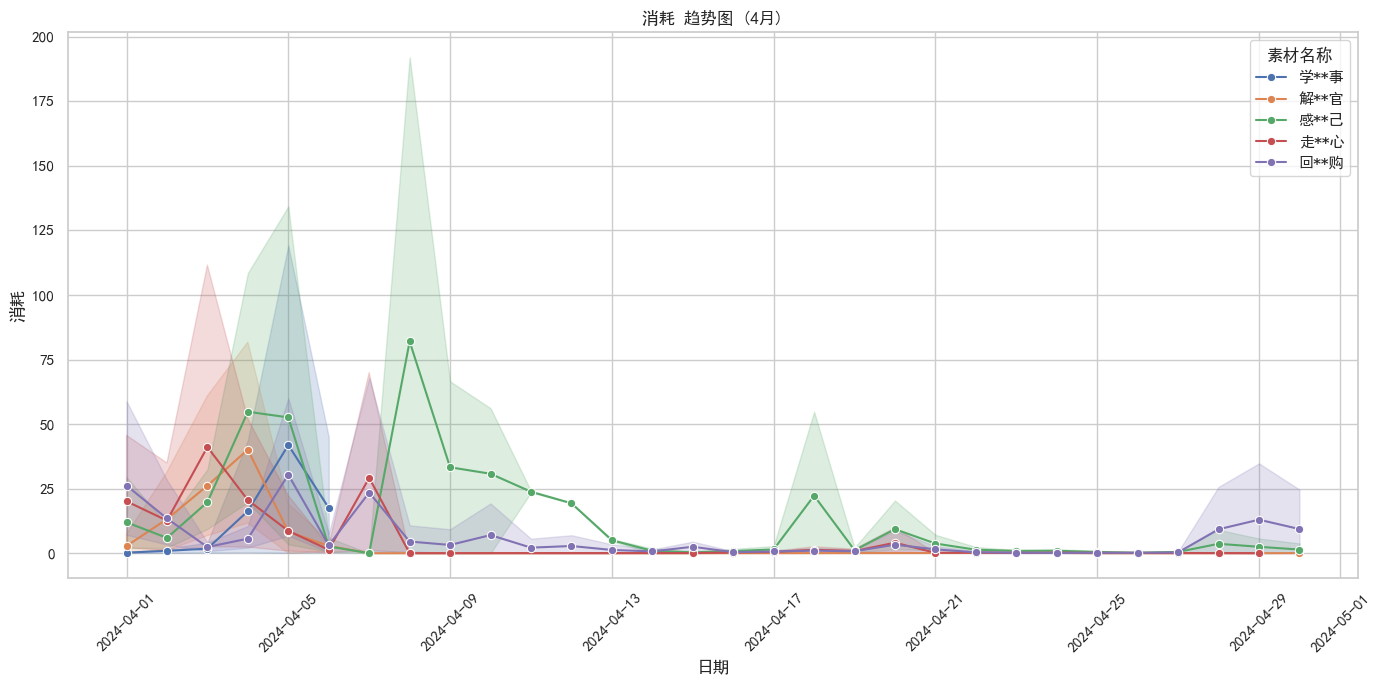

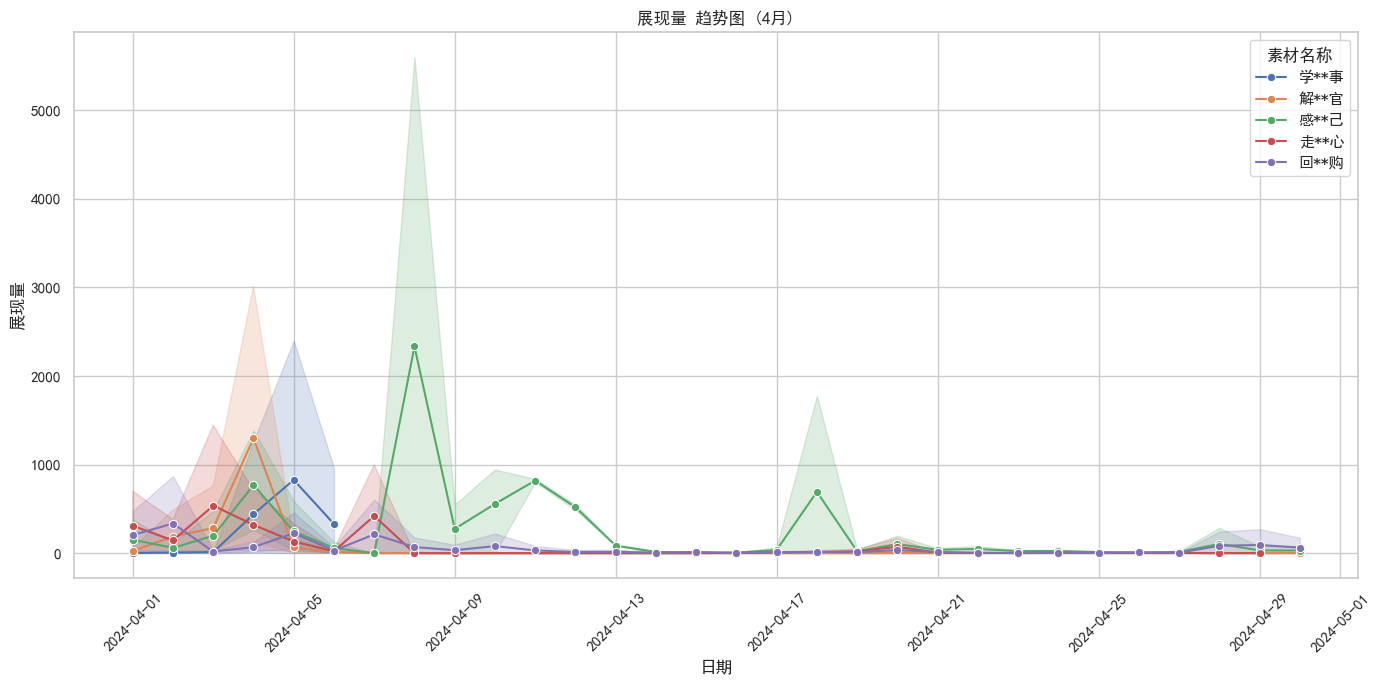

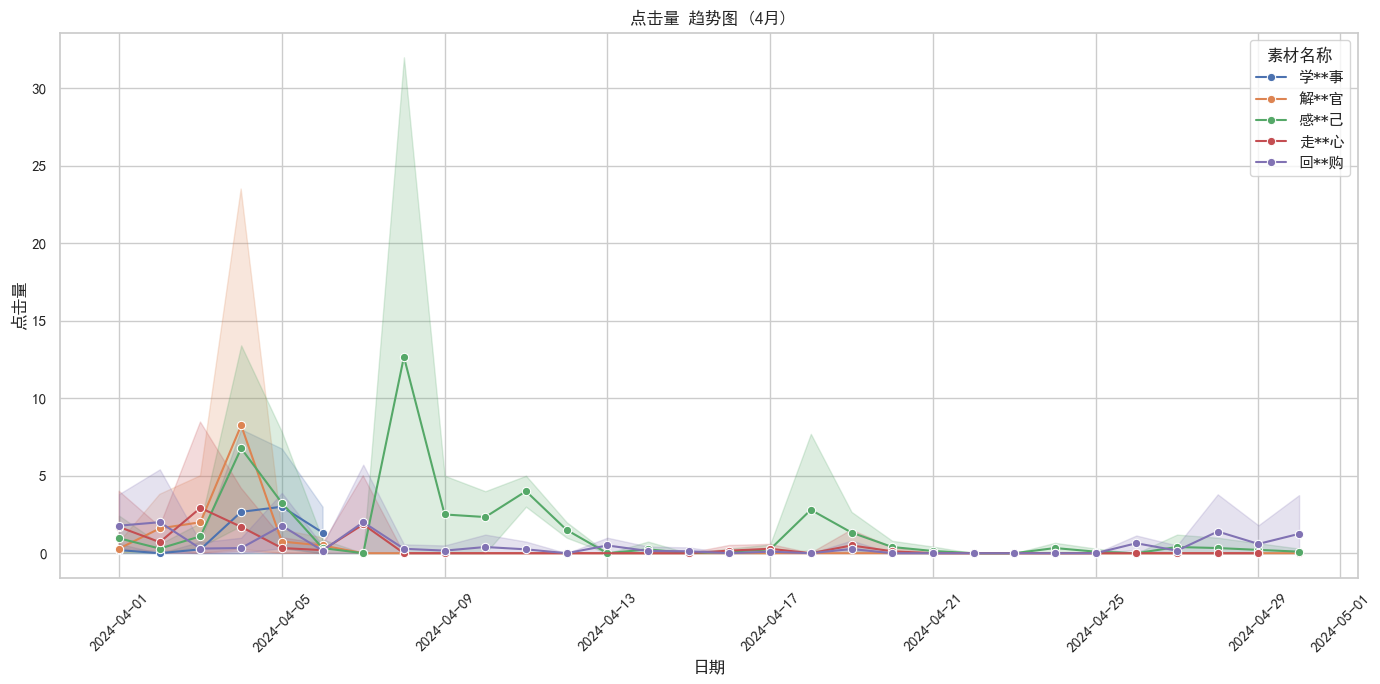

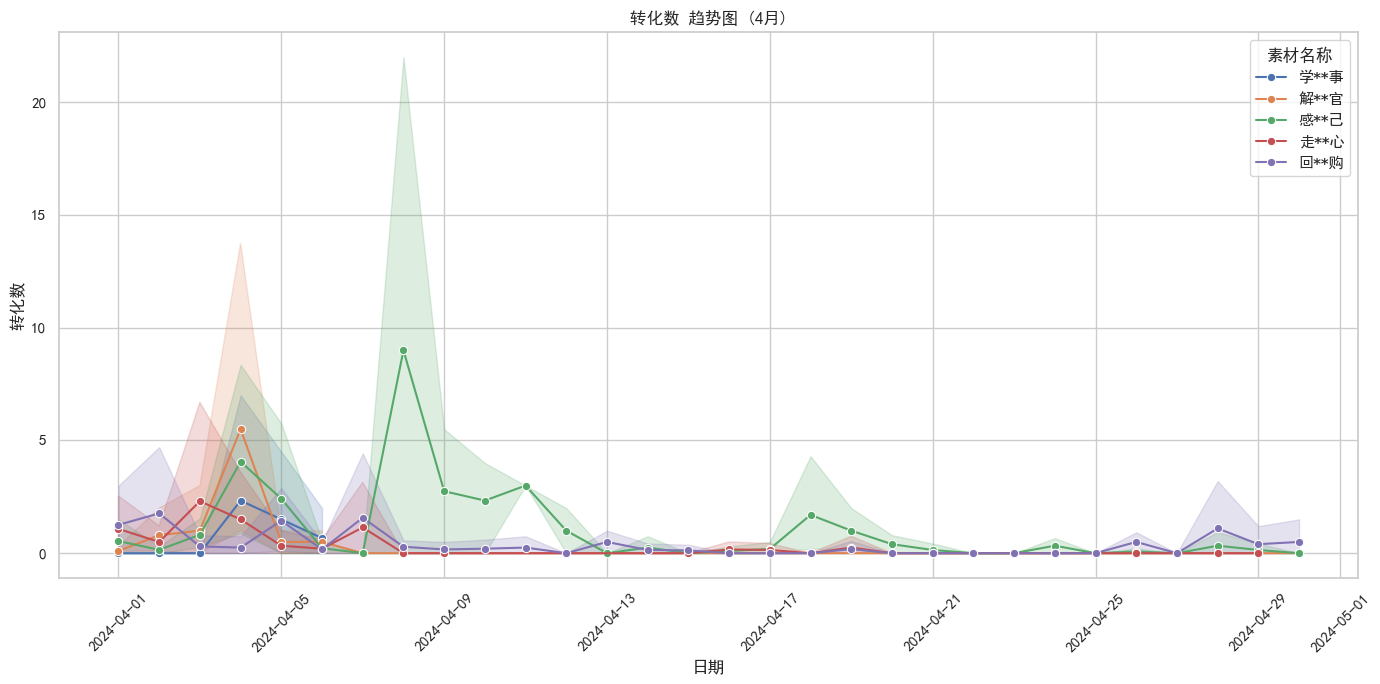

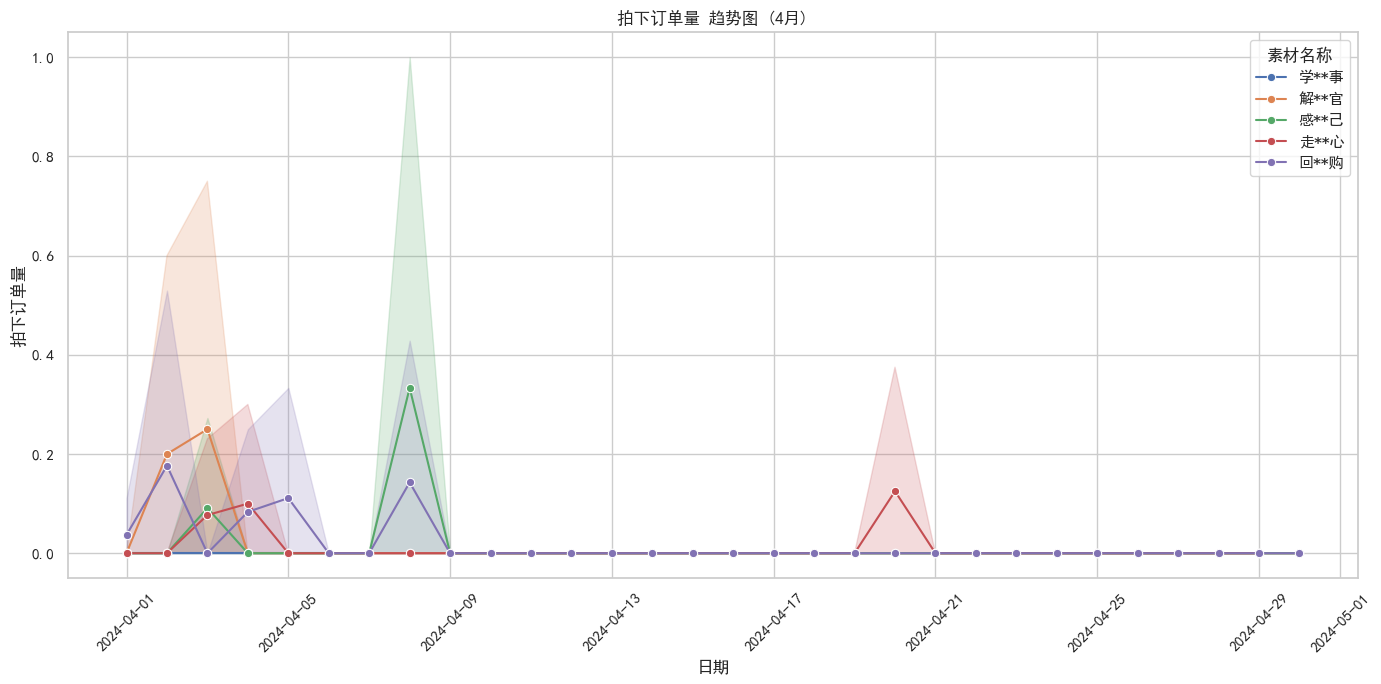

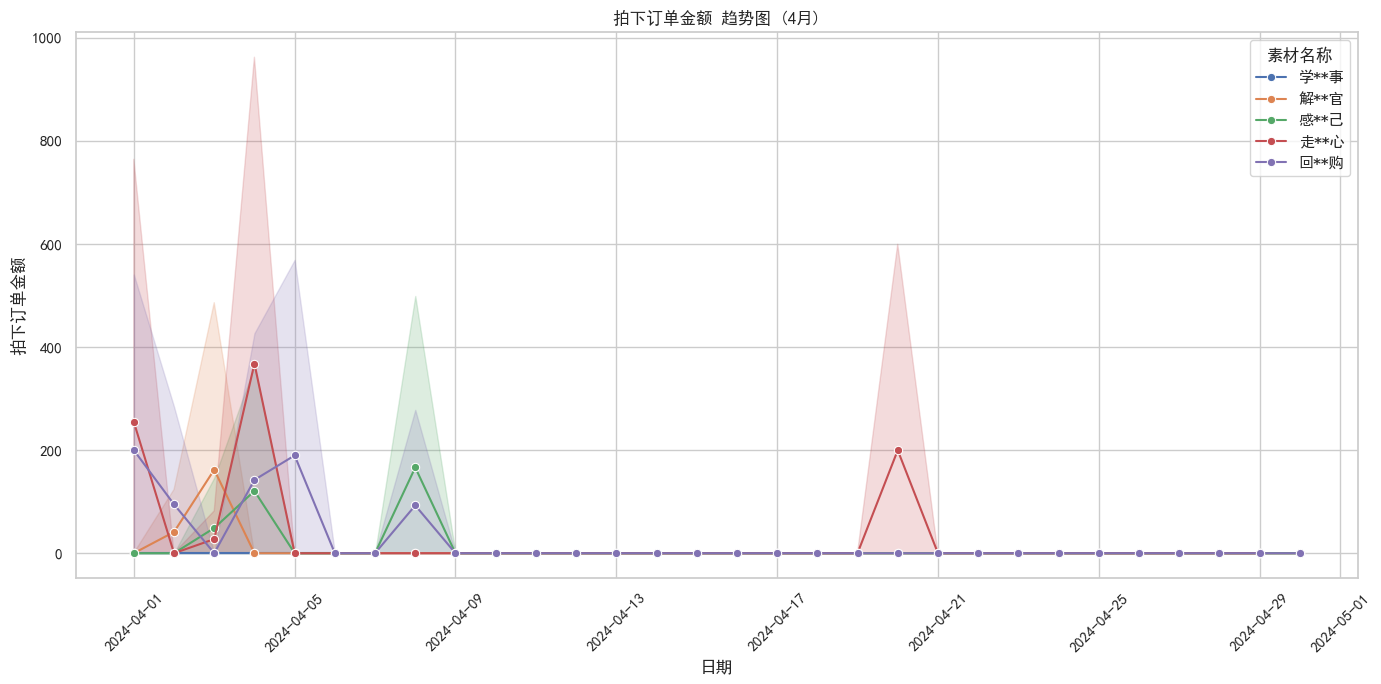

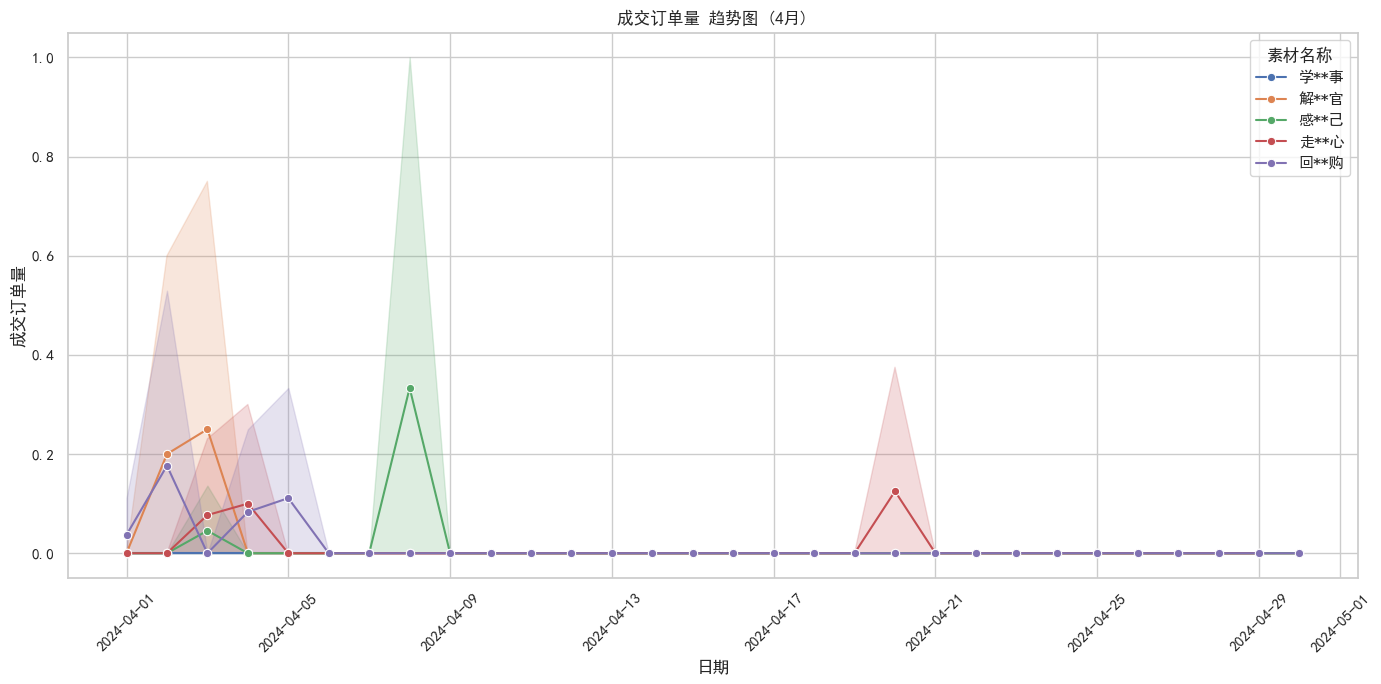

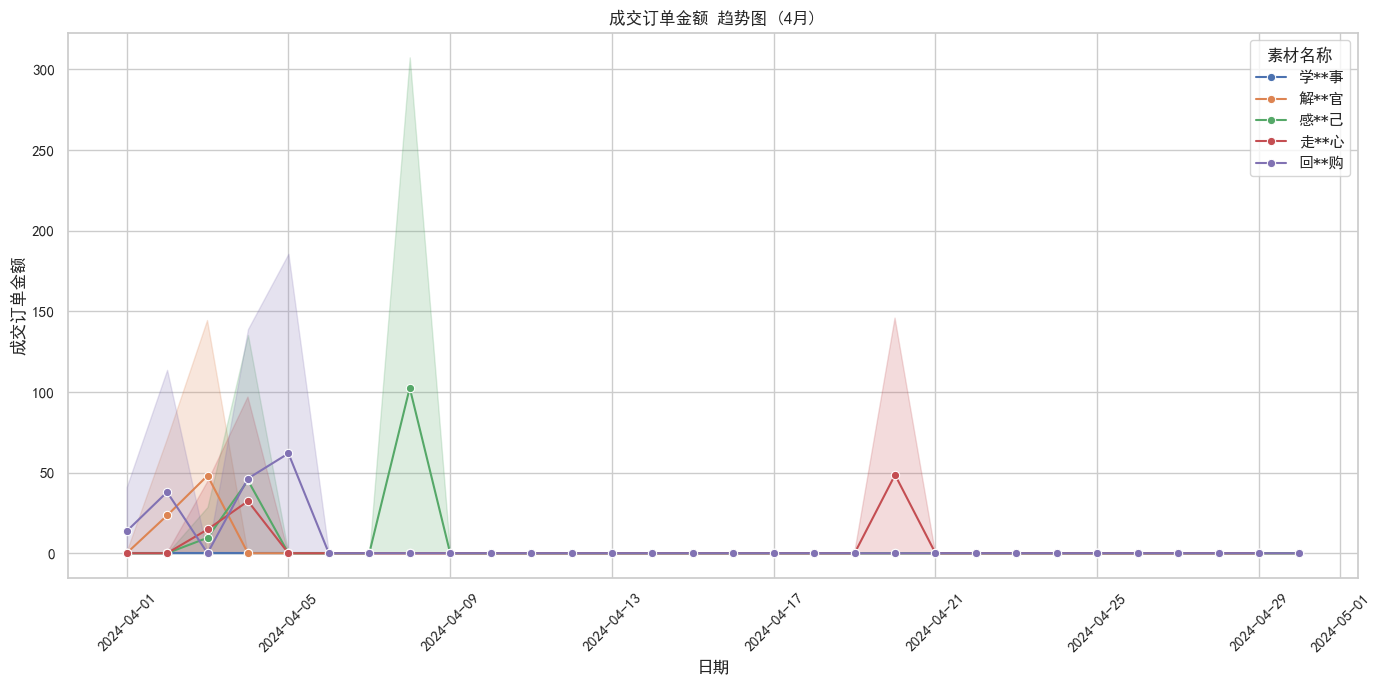

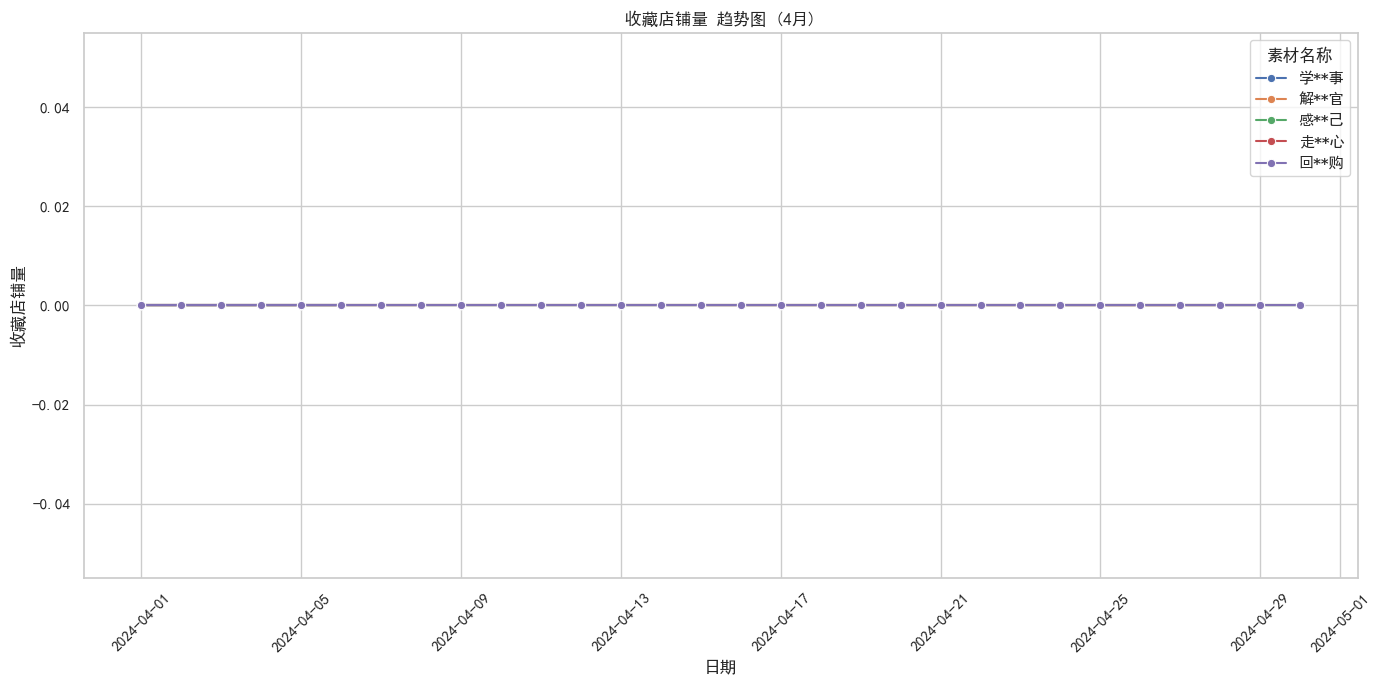

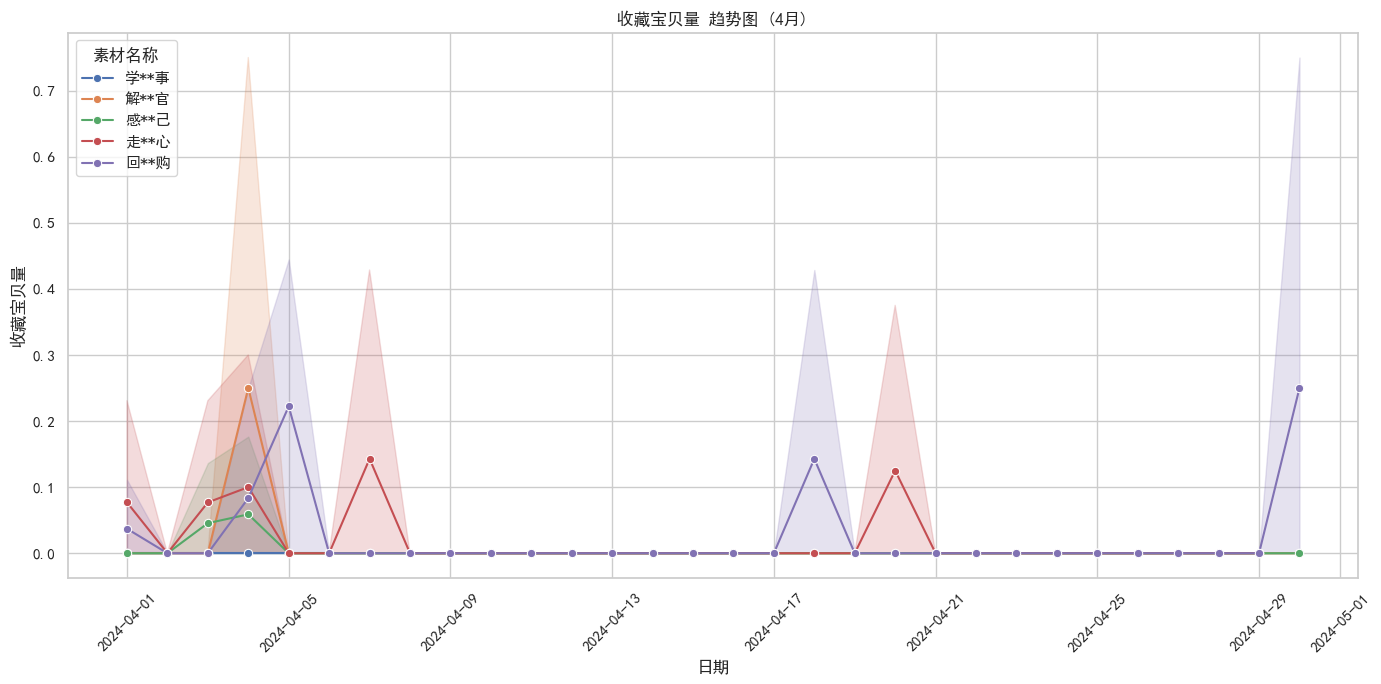

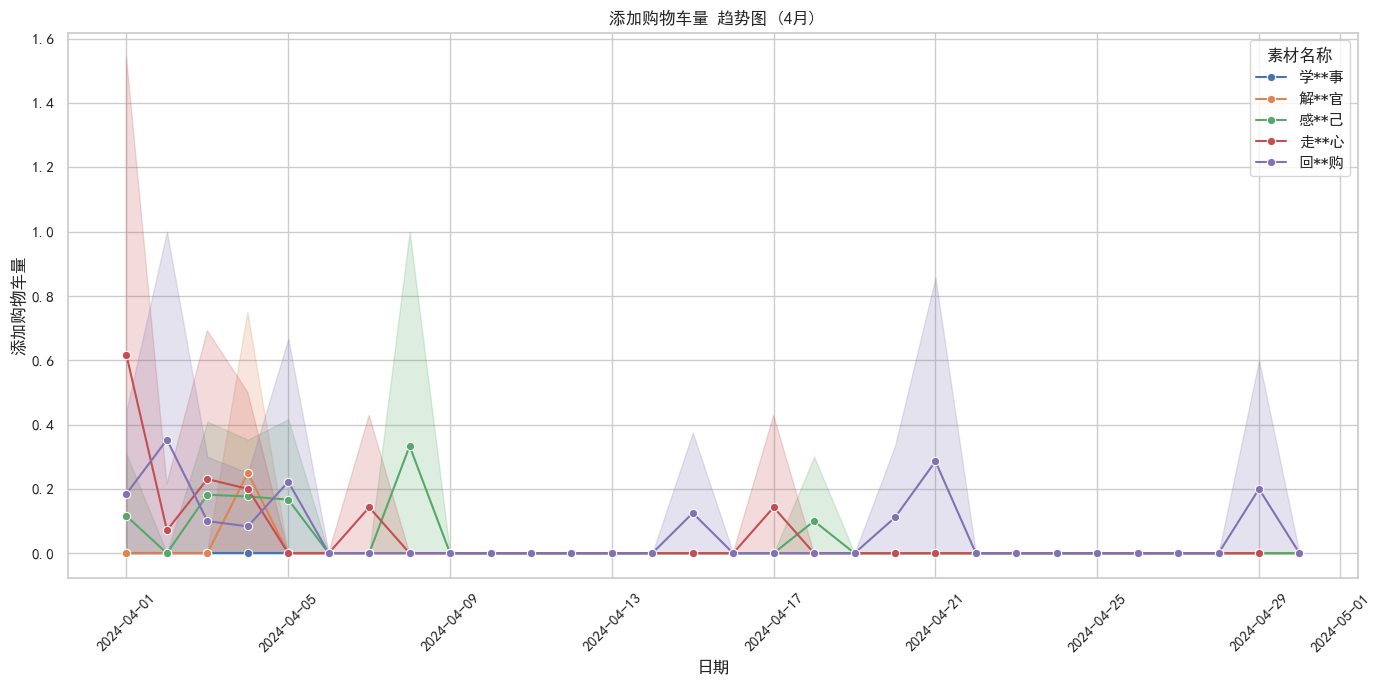

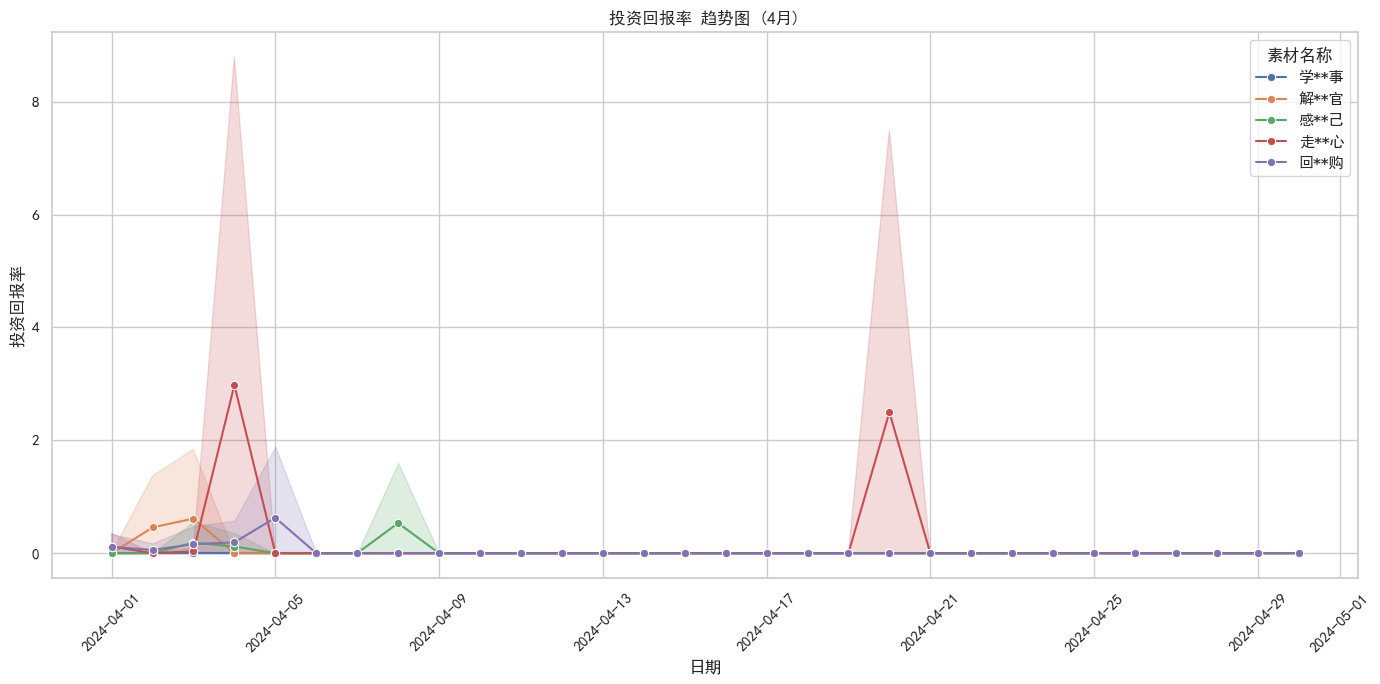

In [18]:
for metric in metrics:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='日期', y=metric, hue='素材名称', data=data_selected, marker='o')
    plt.title(f'{metric} 趋势图 (4月)')
    plt.xlabel('日期')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='素材名称')
    plt.tight_layout()
    plt.show()

In [20]:
data_selected = data_april[data_april['素材名称'].isin(selected_materials)].copy()

In [21]:
data_selected.loc[:, '点击率'] = data_selected['点击量'] / data_selected['展现量']
data_selected.loc[:, '转化率'] = data_selected['转化数'] / data_selected['点击量']

In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 20987 (\N{CJK UNIFIED IDEOGRAPH-51FB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missi

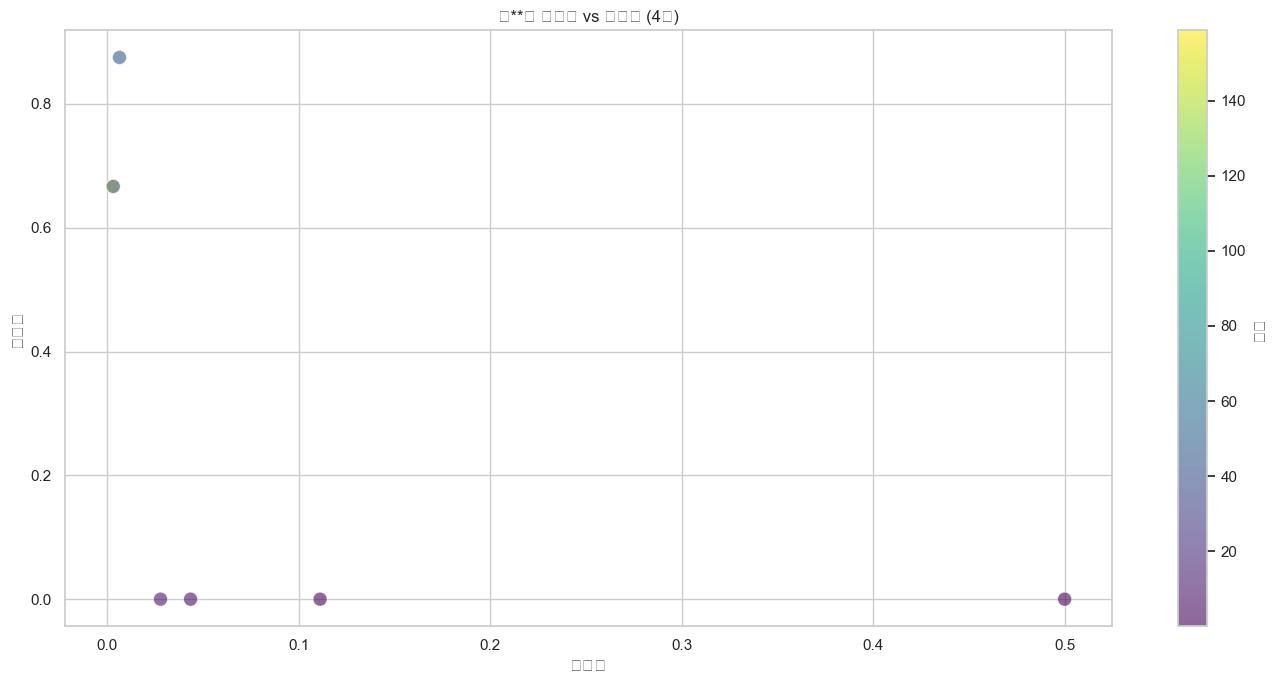

C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from font(s) Arial.
  plt.tight_layout()
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


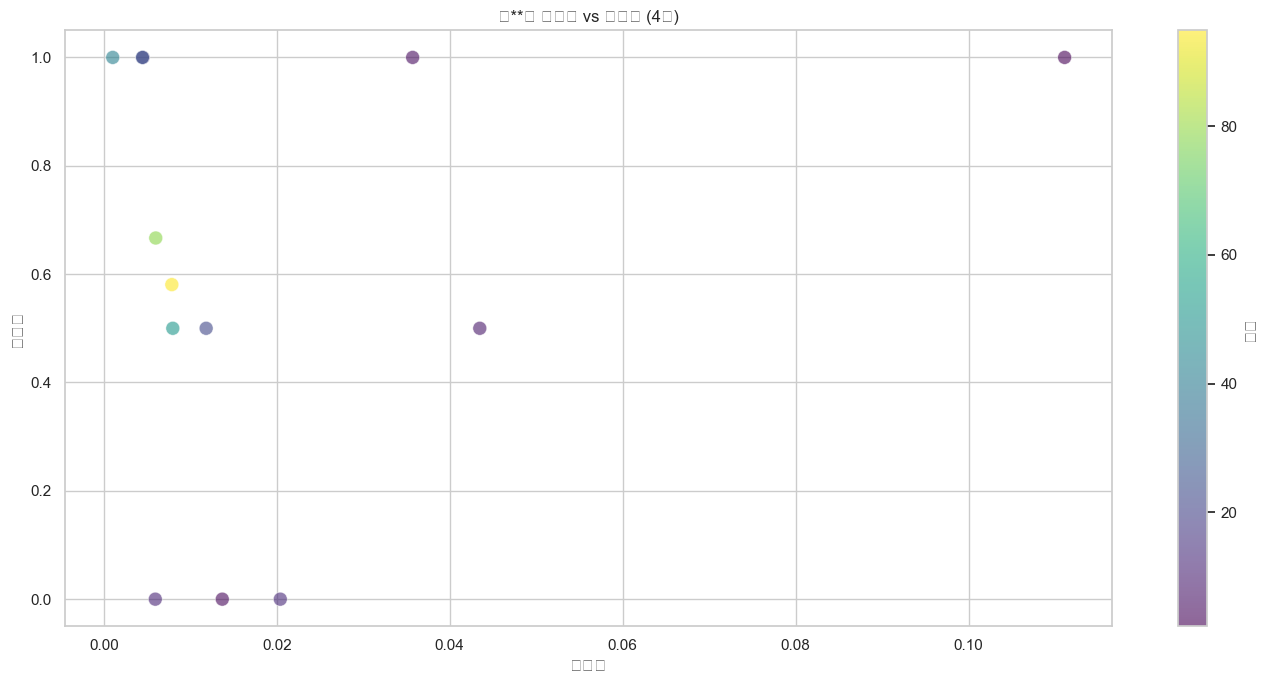

C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from font(s) Arial.
  plt.tight_layout()
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


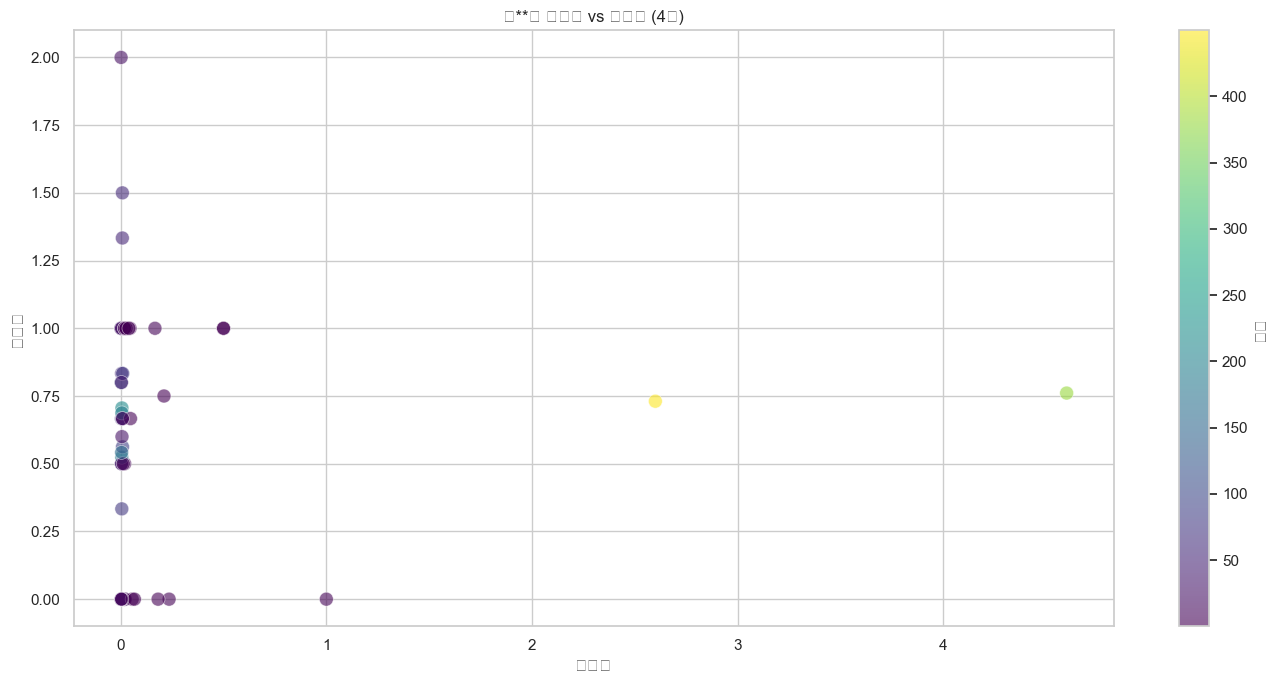

C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) Arial.
  plt.tight_layout()
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


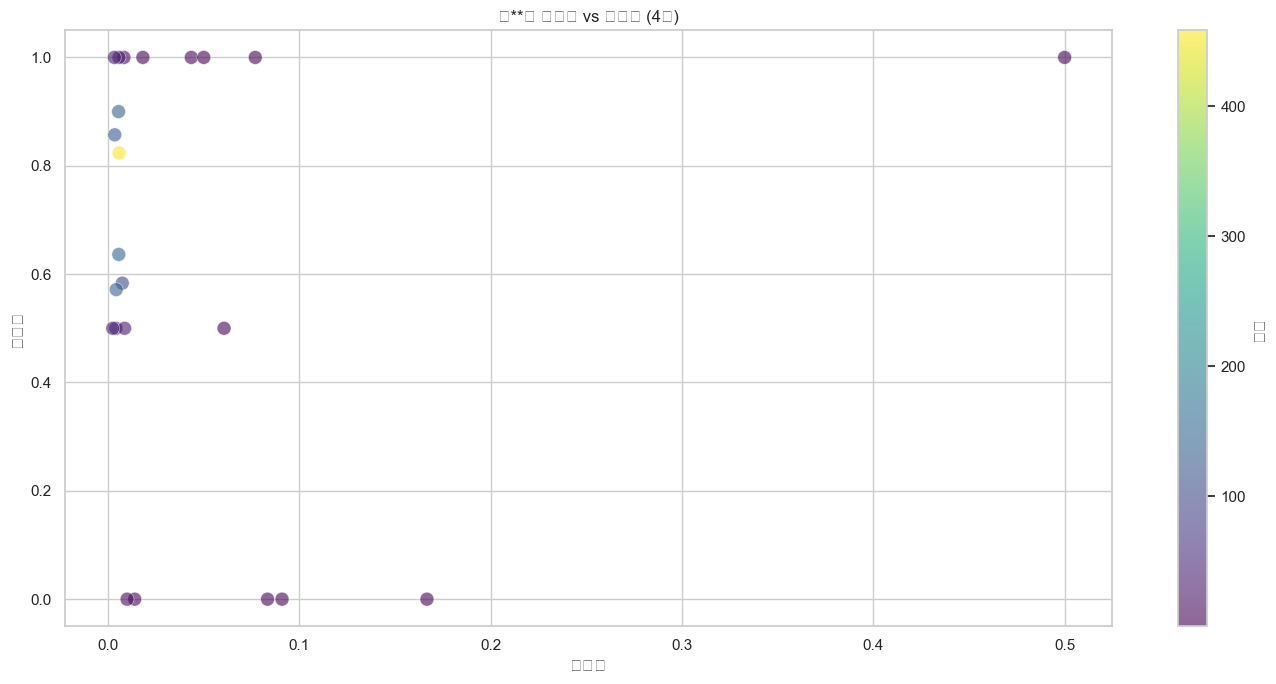

C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hsc88\AppData\Local\Temp\ipykernel_4012\2891524549.py:19: UserWarning: Glyph 36141 (\N{CJK UNIFIED IDEOGRAPH-8D2D}) missing from font(s) Arial.
  plt.tight_layout()
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\DataProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36141 (\N{CJK UNIFIED IDEOGRAPH-8D2D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


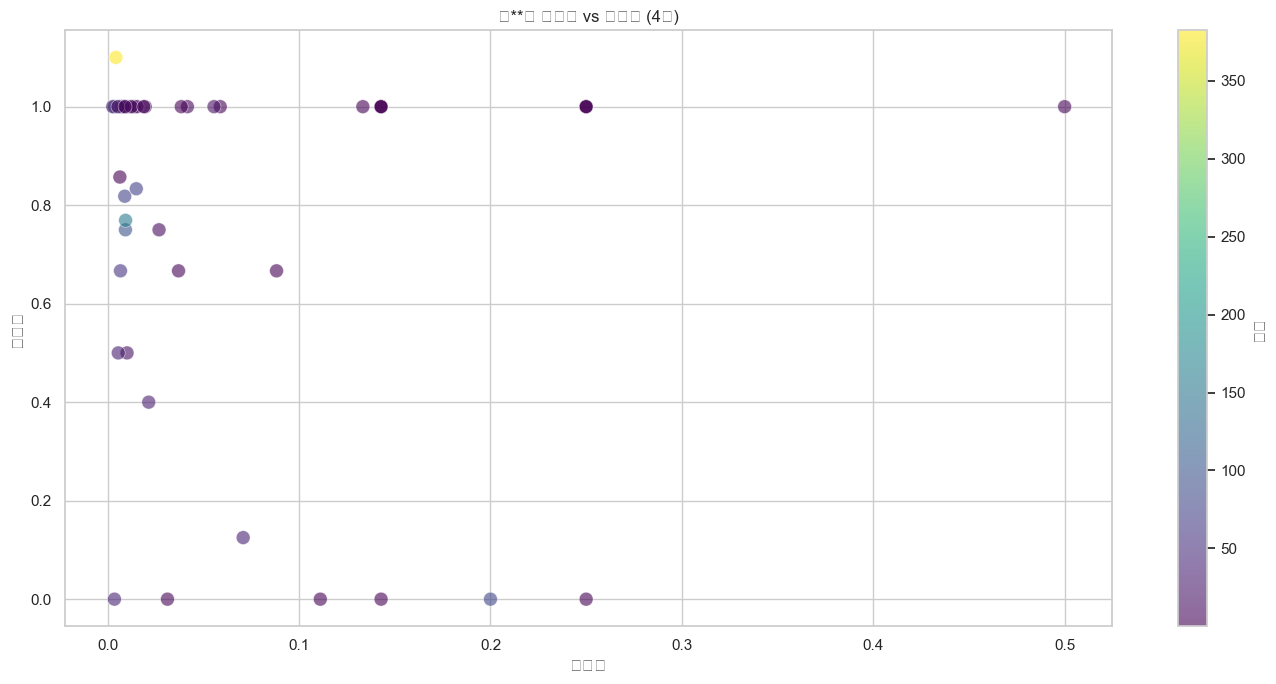

In [25]:
for material in selected_materials:
    data_material = data_selected[data_selected['素材名称'] == material]
    plt.figure(figsize=(14, 7))
    scatter = plt.scatter(
        data_material['点击率'],
        data_material['转化率'],
        c=data_material['消耗'],
        cmap='viridis',
        s=100,
        alpha=0.6,
        edgecolors='w',
        linewidth=0.5
    )
    plt.colorbar(scatter, label='消耗')
    plt.title(f'{material} 点击率 vs 转化率 (4月)')
    plt.xlabel('点击率')
    plt.ylabel('转化率')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

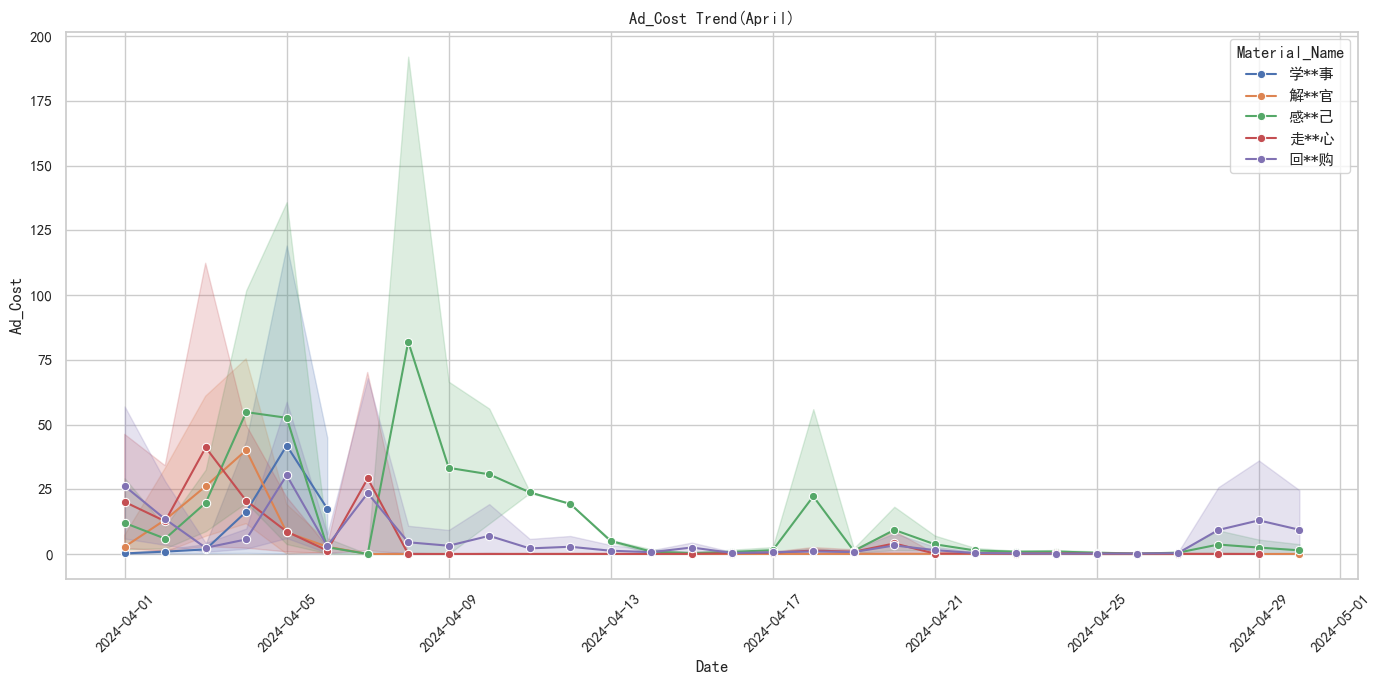

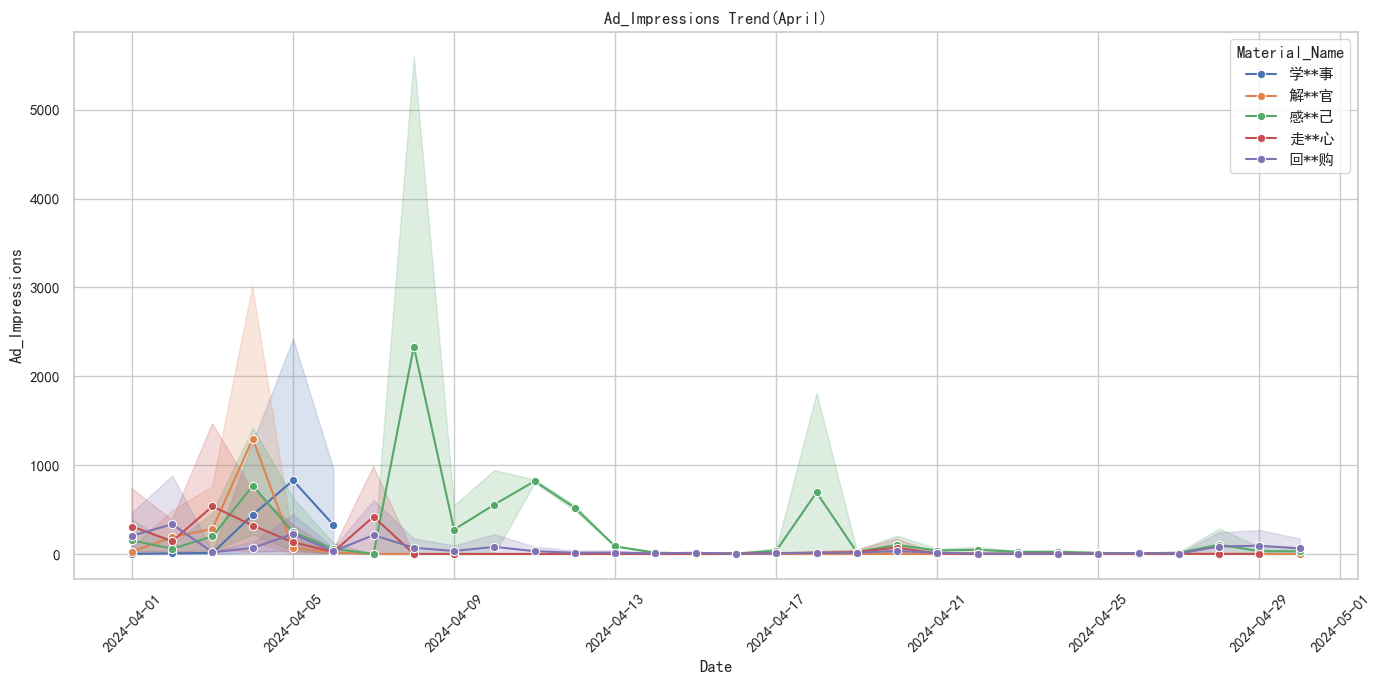

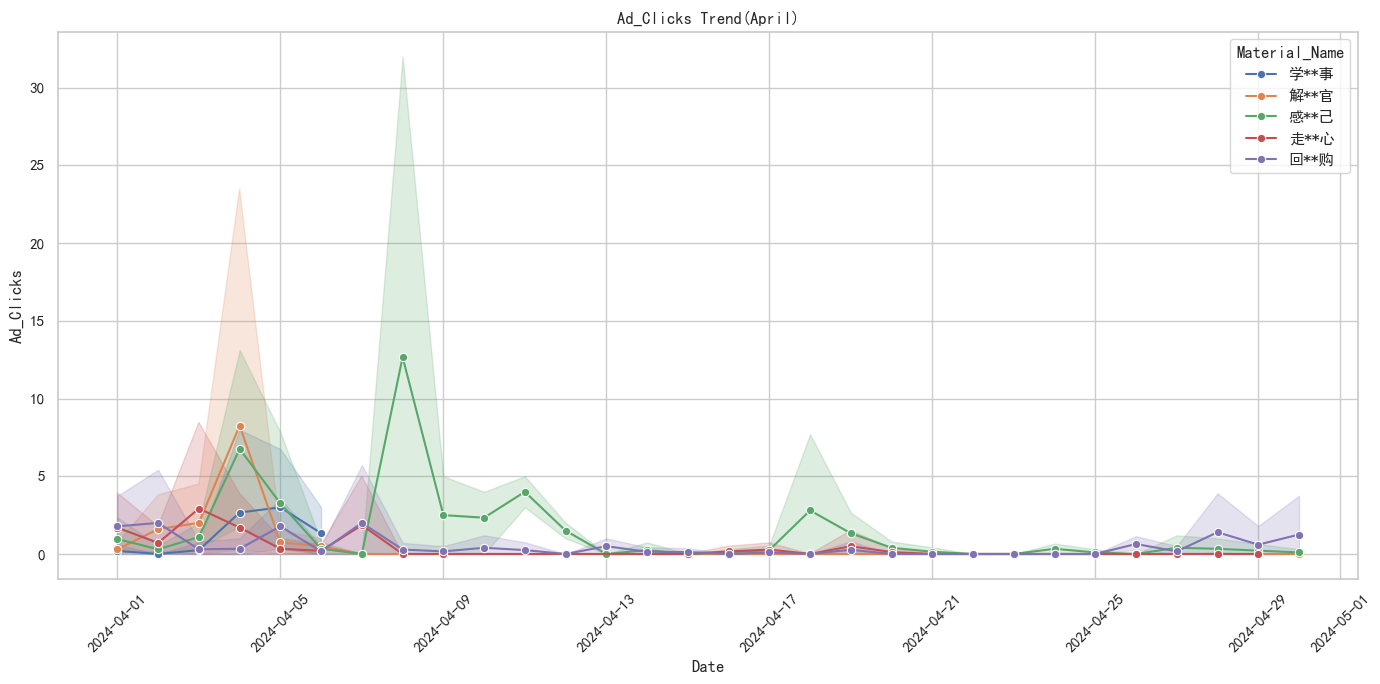

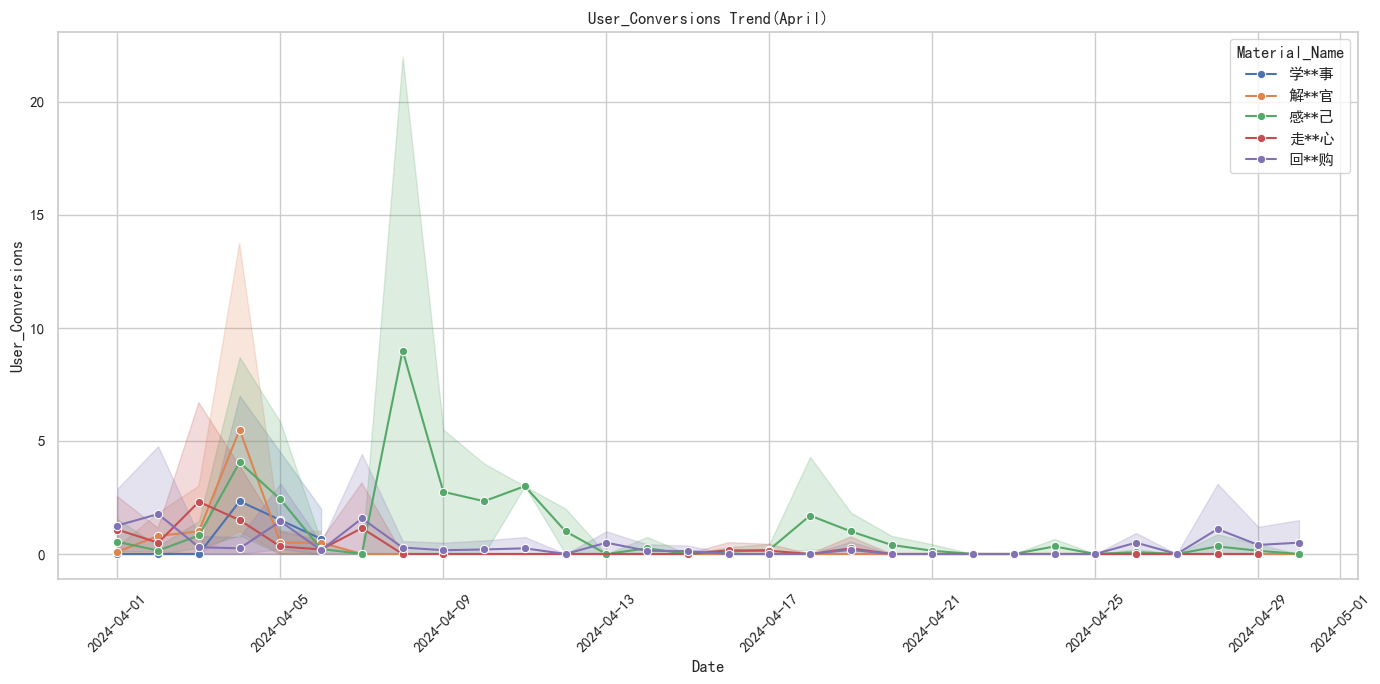

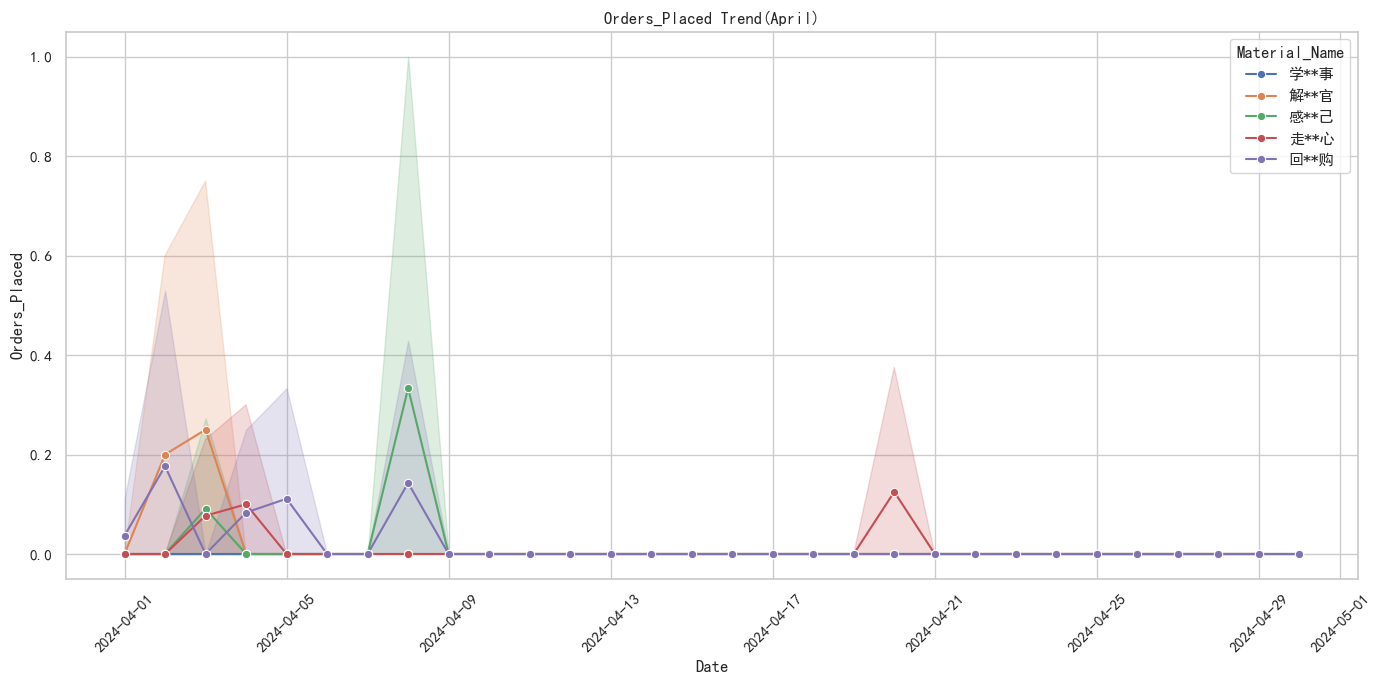

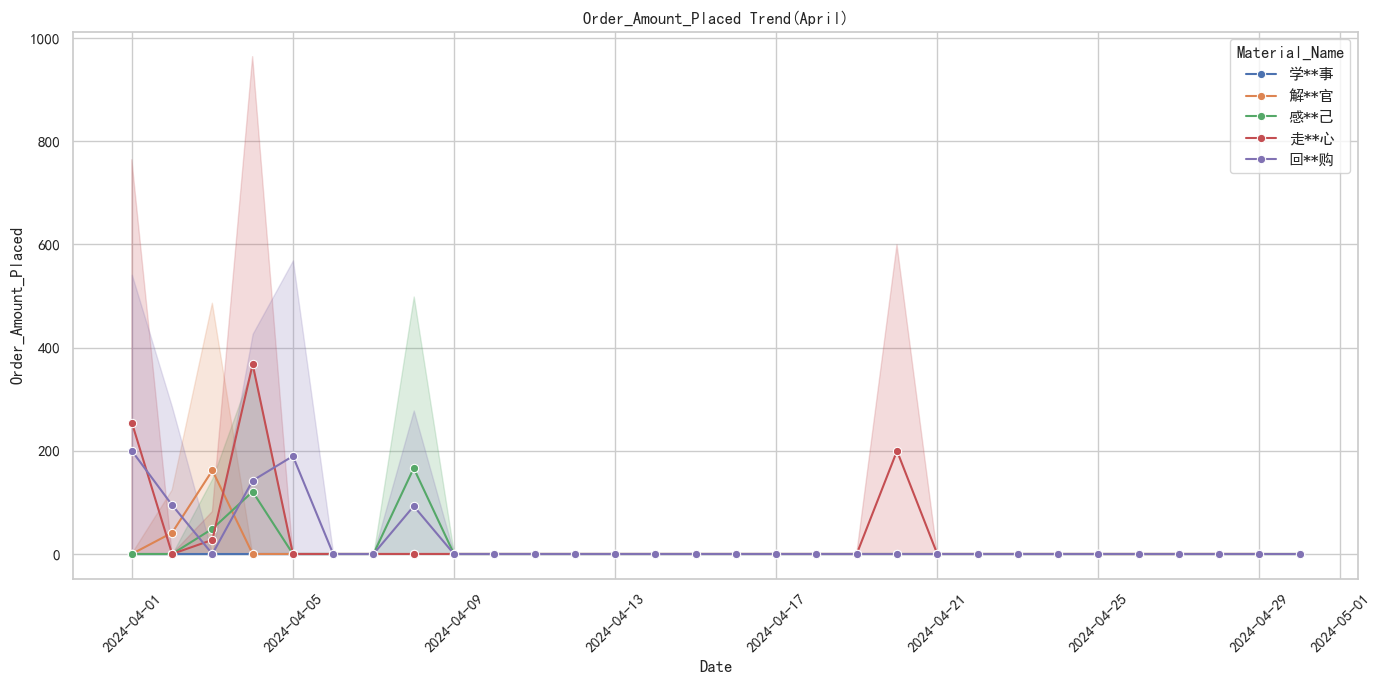

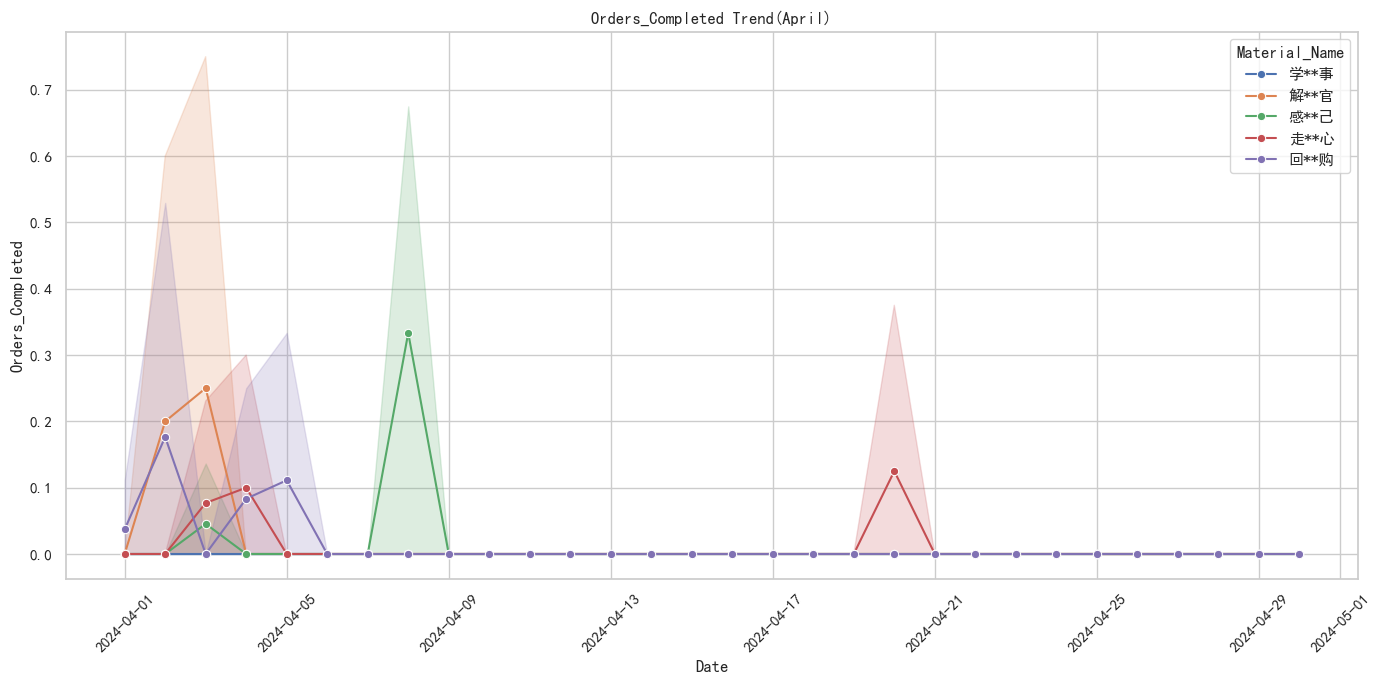

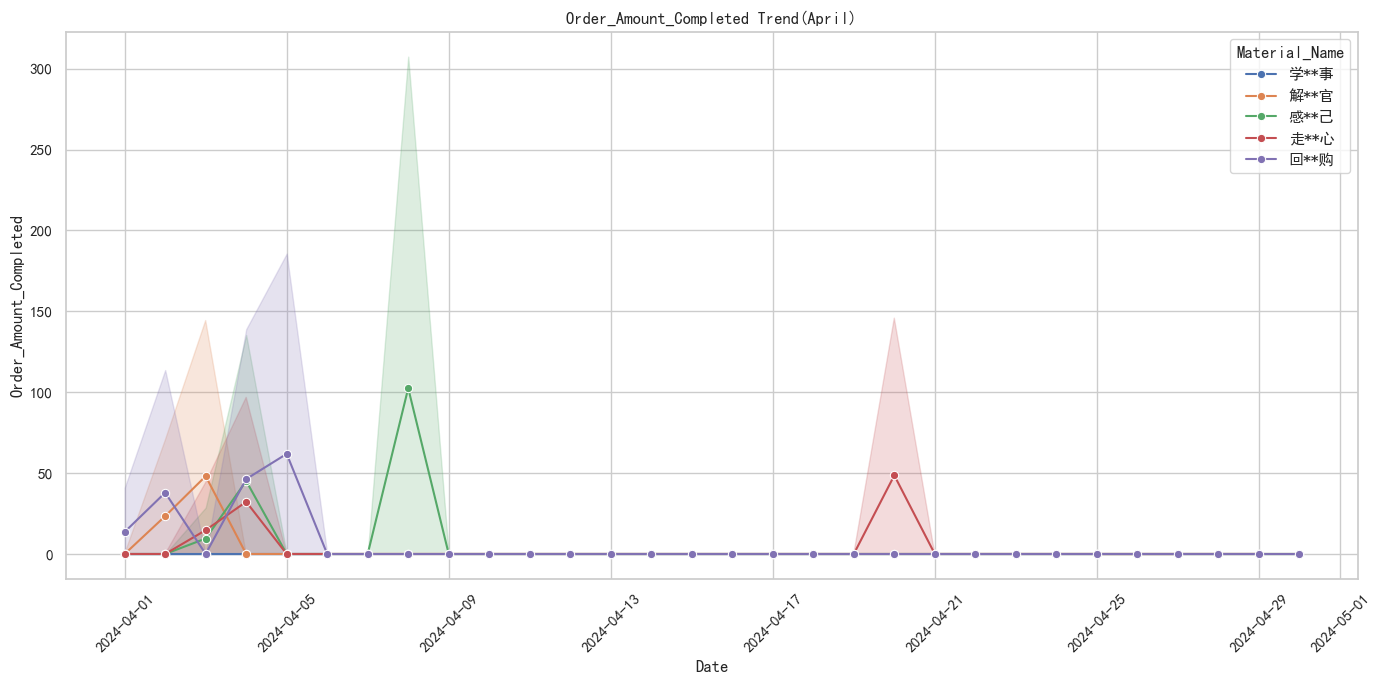

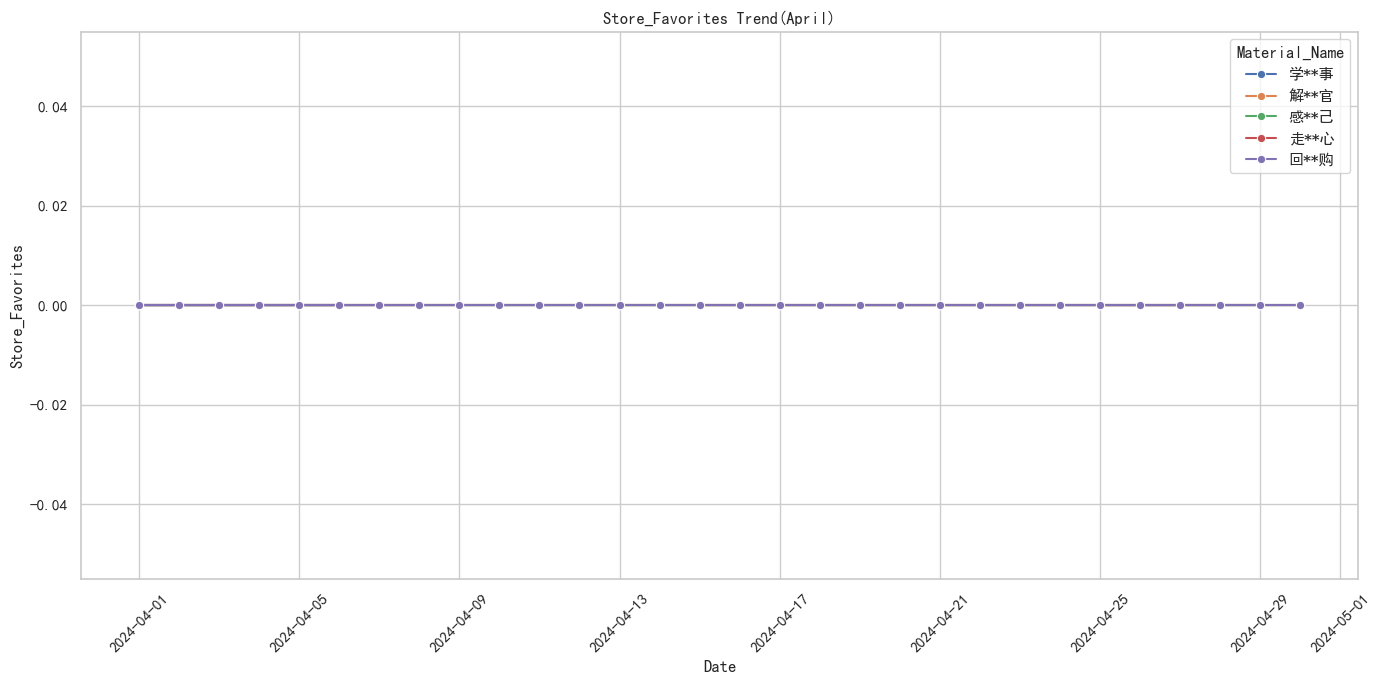

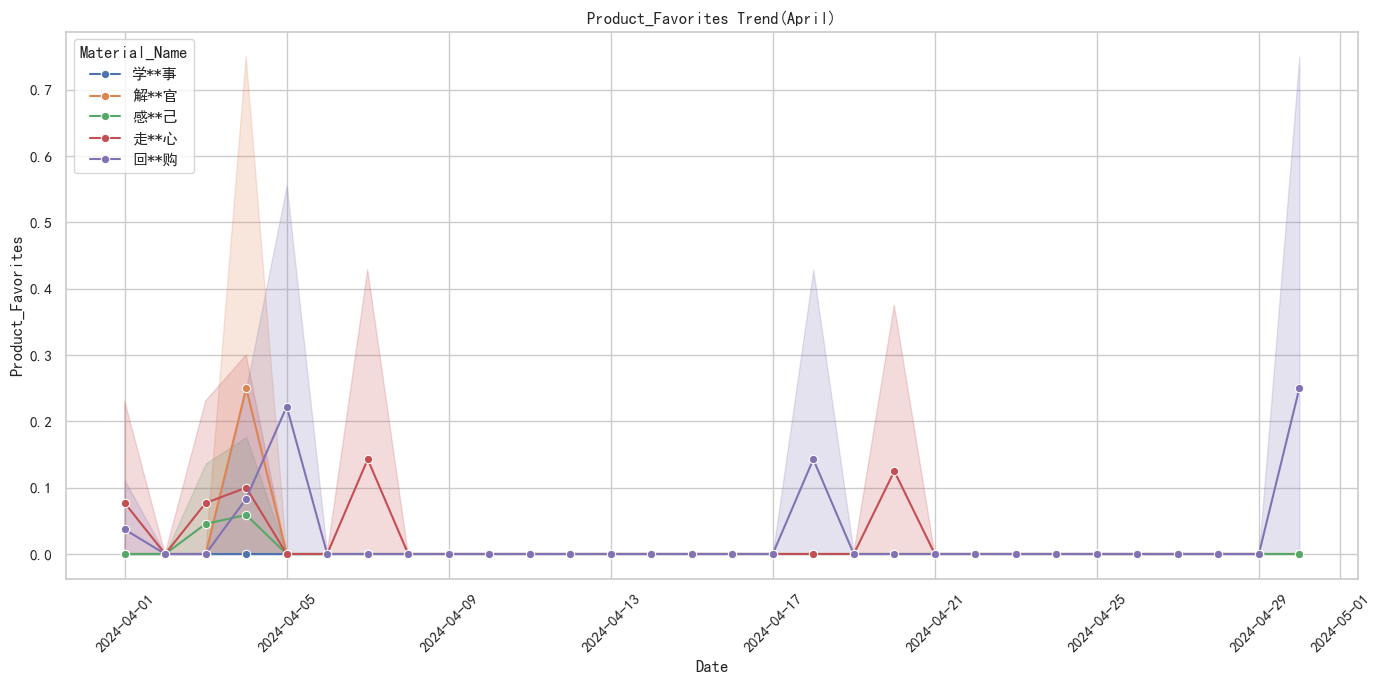

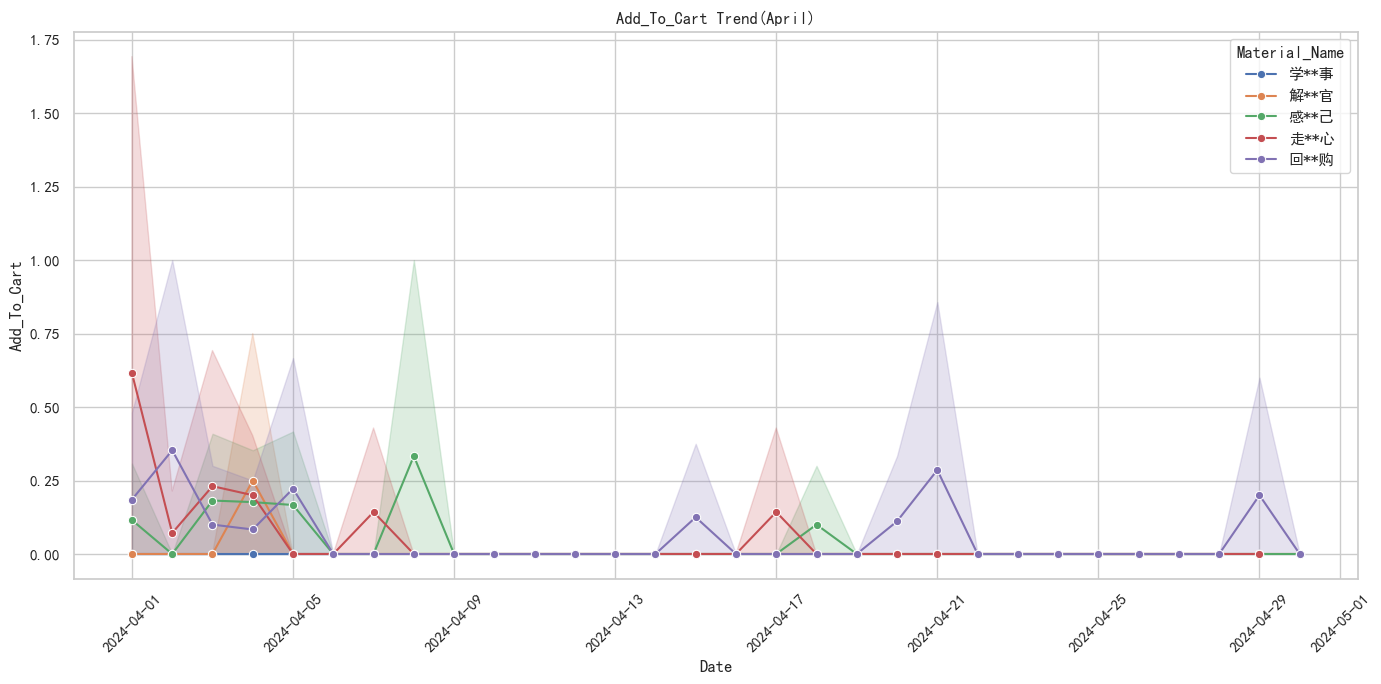

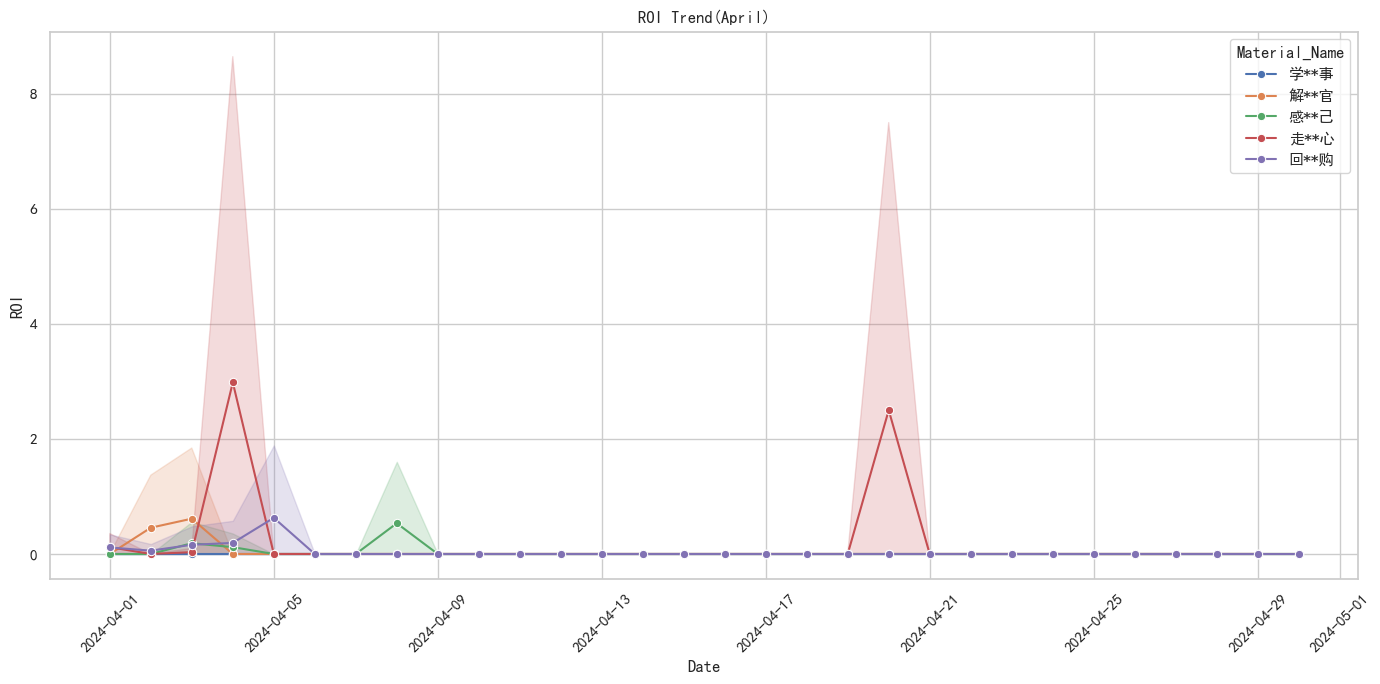